In [1]:
!pip install tensorflow


# Import necessary libraries

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#Load the dataset

In [13]:
from google.colab import files
uploaded = files.upload()


Saving dataset_motor.zip to dataset_motor.zip


In [18]:
import zipfile
import os

# The uploaded file will be saved in '/content' directory
zip_file = 'dataset_motor.zip'  # Change this if your filename is different
unzip_dir = '/content/dataset_motor/'

# Extract the ZIP file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Check the extracted files
os.listdir(unzip_dir)

dataset_folder = os.path.join(unzip_dir, 'dataset_motor')
class_names = ['bebek', 'matic', 'sport', 'trail']


In [19]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            images.append(img)
            labels.append(label)
    return images, labels

image_data = []
image_labels = []

for idx, class_name in enumerate(class_names):
    folder_path = os.path.join(dataset_folder, class_name)
    images, labels = load_images_from_folder(folder_path, class_name)
    image_data.extend(images)
    image_labels.extend(labels)

In [20]:
def preprocess_images(images, target_size=(128, 128)):
    resized_images = []
    for img in images:
        img_resized = cv2.resize(img, target_size)  # Resize to (128, 128)
        img_normalized = img_resized.astype('float32') / 255.0  # Normalize
        resized_images.append(img_normalized)
    return np.array(resized_images)

processed_images = preprocess_images(image_data)

In [21]:
label_map = {class_name: idx for idx, class_name in enumerate(class_names)}
labels = [label_map[label] for label in image_labels]
labels_one_hot = to_categorical(labels, num_classes=len(class_names))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(processed_images, labels_one_hot, test_size=0.2, random_state=42)

In [23]:
def create_cnn_model(input_shape=(128, 128, 3), num_classes=4):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
cnn_model = create_cnn_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.5692 - loss: 1.1358 - val_accuracy: 0.6877 - val_loss: 0.8642
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7383 - loss: 0.7280 - val_accuracy: 0.7497 - val_loss: 0.6854
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7859 - loss: 0.5806 - val_accuracy: 0.7391 - val_loss: 0.7138
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8230 - loss: 0.4820 - val_accuracy: 0.7708 - val_loss: 0.6383
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8710 - loss: 0.3363 - val_accuracy: 0.7470 - val_loss: 0.6941
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9172 - loss: 0.2246 - val_accuracy: 0.7484 - val_loss: 0.8379
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9668 - loss: 0.1083 - val_accuracy: 0.7655 - val_loss: 0.9088
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9821 - loss: 0.0778 - val_accuracy: 0.7563 - 

In [27]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7903 - loss: 1.7975
Test Accuracy: 0.782608687877655


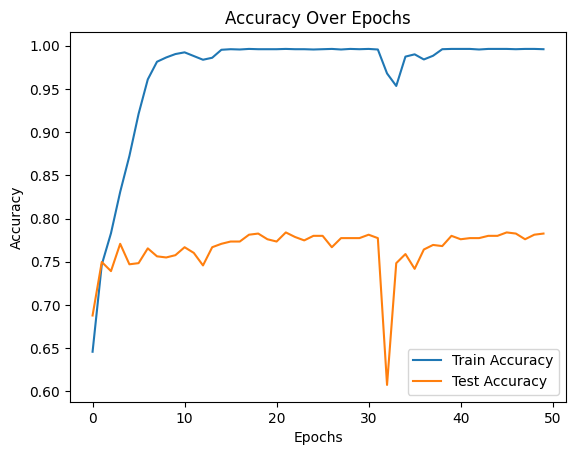

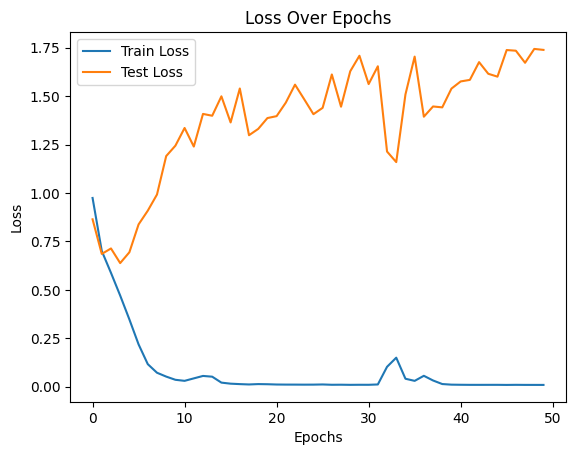

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()